In [2]:
from bs4 import BeautifulSoup
import urllib
import pandas as pd
import requests
import warnings; warnings.simplefilter('ignore')  
import time

In [3]:
my_data = pd.read_csv('scraped_player_data_m24_full.csv')
my_data.shape

(547, 66)

In [5]:
data0 = pd.read_csv('already_gathered_mut_data.csv')
data0.shape

(5285, 61)

In [6]:
colsa = my_data.columns
colsb = data0.columns

inters = colsa.intersection(colsb)
print(list(set(colsb) - set(colsa)))

['ch3', 'urlid', 'name', 'capHit', 'overall', 'canAuction', 'plays_ball_in_air', 'ch4', 'ch1', 'ch2']


In [7]:
data0['ovr']=data0['overall']
data0['id']=data0['urlid']
data0['player'] = data0['name']

data0=data0.drop('overall', axis=1)
del data0['name']
del data0['capHit']
del data0['urlid']
data0.head()

,Unnamed: 0,pos,SPD,STR,AGI,ACC,AWR,CTH,JMP,STA,...,strips_ball,plays_ball_in_air,canAuction,ch1,ch2,ch3,ch4,ovr,id,player
0,0,CB,97,58,97,97,96,87,97,96,...,No,Aggressive,True,Atlanta Falcons:1,Blanket Coverage:2,Return Man:1,NaN,97,28498,Deion Sanders
1,1,CB,97,58,97,97,96,87,97,96,...,No,Aggressive,True,San Francisco 49ers:1,Blanket Coverage:2,Return Man:1,NaN,97,28499,Deion Sanders
2,2,CB,97,58,97,97,96,87,97,96,...,No,Aggressive,True,Dallas Cowboys:1,Blanket Coverage:2,Return Man:1,NaN,97,28500,Deion Sanders
3,3,FS,94,83,95,96,91,82,96,98,...,Yes,Aggressive,False,Washington Redskins:1,Toughness:2,Tip Drill:1,Secure Tackler:1,97,19,Sean Taylor
4,4,FS,94,83,95,96,91,82,96,98,...,Yes,Aggressive,False,Washington Redskins:1,Physical Front:2,Tip Drill:1,Secure Tackler:1,97,22,Sean Taylor


In [8]:
newdf = pd.read_csv('all_players_m24_stats.csv')

#p_data['strips_ball'] = p_data['strips_ball']*1

tempdf = newdf[['player', 'id', 'strips_ball', 'big_hitter', 'plays_ball_in_air', 'possession_catches', 'rac_catches',\
               'sideline_catches']]

tempdf['strips_ball'] = tempdf['strips_ball'].astype(str)
tempdf['plays_ball_in_air'] = tempdf['plays_ball_in_air'].astype('category')
tempdf['strips_ball'] = tempdf['strips_ball'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})
tempdf['big_hitter'] = tempdf['big_hitter'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})
tempdf['rac_catches'] = tempdf['rac_catches'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})
tempdf['sideline_catches'] = tempdf['sideline_catches'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})
tempdf['possession_catches'] = tempdf['possession_catches'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})

tempdf.head()

,player,id,strips_ball,big_hitter,plays_ball_in_air,possession_catches,rac_catches,sideline_catches
0,Adam Vinatieri,3,0.0,0.0,0,0.0,0.0,0.0
1,Brandon Williams,4,0.0,0.0,0,0.0,0.0,0.0
2,Everson Griffen,5,0.0,0.0,0,0.0,0.0,0.0
3,Jordy Nelson,6,0.0,0.0,0,1.0,0.0,1.0
4,Deshaun Watson,7,0.0,0.0,0,0.0,0.0,0.0


In [9]:
print (tempdf['strips_ball'].value_counts())
print (tempdf['big_hitter'].value_counts())
print (tempdf['plays_ball_in_air'].value_counts())
print (tempdf['possession_catches'].value_counts())
print (tempdf['rac_catches'].value_counts())

0.0    1753
1.0    1008
Name: strips_ball, dtype: int64
0.0    1722
1.0    1070
Name: big_hitter, dtype: int64
0               4112
Balanced         702
Aggressive       676
Conservative     342
Name: plays_ball_in_air, dtype: int64
0.0    1117
1.0     717
Name: possession_catches, dtype: int64
0.0    964
1.0    842
Name: rac_catches, dtype: int64


In [10]:
relevant = ['player', 'id', 'strips_ball', 'big_hitter', 'plays_ball_in_air', 'possession_catches', 'rac_catches',\
               'sideline_catches']

for thing in relevant:
    
    newdf[thing] = tempdf[thing]
    
newdf.head()

,Unnamed: 0,ACC,AGI,AWR,BCV,BKS,Blanket Coverage,CAR,CIT,CTH,...,id,ovr,player,plays_ball_in_air,pos,possession_catches,rac_catches,sideline_catches,size,strips_ball
0,0,57,56,88,31,46,0.0,56,36,62,...,3,94,Adam Vinatieri,0,K,0.0,0.0,0.0,0,0.0
1,1,78,62,93,35,95,0.0,64,44,53,...,4,94,Brandon Williams,0,DT,0.0,0.0,0.0,"Ht: 6' 1"" Wt: 340",0.0
2,2,87,81,94,53,88,0.0,60,53,62,...,5,94,Everson Griffen,0,RE,0.0,0.0,0.0,"Ht: 6' 3"" Wt: 273",0.0
3,3,92,89,94,89,58,0.0,82,92,95,...,6,94,Jordy Nelson,0,WR,1.0,0.0,1.0,"Ht: 6' 3"" Wt: 217",0.0
4,4,93,92,88,78,31,0.0,68,37,45,...,7,95,Deshaun Watson,0,QB,0.0,0.0,0.0,"Ht: 6' 2"" Wt: 210",0.0


In [159]:
#newdf.to_csv('m24_412_numeric.csv')

In [11]:
off_atts = ['SPD', 'STR', 'AGI', 'ACC', 'AWR', 'CTH', 'JMP', 'STA', 'KR','TRK', 'ELU', 'BCV', 'SFA',
            'SPM', 'JKM', 'CAR', 'RTE', 'CIT', 'SPC', 'RLS',  'RBK', 'PBK','IMP']
qb_atts = ['THP', 'TAS', 'TAM', 'TAD', 'TOR', 'PAC']

chem_list = ['Read and React', 'Physical Front', 'Toughness', 'Blanket Coverage', \
             'Go Deep', 'Move the Sticks', 'Pound the Rock', 'Secure Tackler']
'''
             'Playmaker', 'Pick Specialist', 'Battle Ready', 'Clutch Kicker', 'Conductor', \
             'Energized', 'Focused Kicker', 'Gunslinger', 'Hot Hands', 'Identified', 'Jump the Snap', \
             'Never Stumble', 'Pick 6', 'Return Man', 'Tip Drill', 'Secure Pass Blocker', 'Lead the Way']'''

"\n             'Playmaker', 'Pick Specialist', 'Battle Ready', 'Clutch Kicker', 'Conductor',              'Energized', 'Focused Kicker', 'Gunslinger', 'Hot Hands', 'Identified', 'Jump the Snap',              'Never Stumble', 'Pick 6', 'Return Man', 'Tip Drill', 'Secure Pass Blocker', 'Lead the Way']"

In [12]:
align = pd.read_csv('doc_for_chem_align.csv')
align.head()

for chem in chem_list:
    align[chem]=0

In [13]:
align.head()

,Unnamed: 0,name,ch1,ch2,ch3,ch4,id,Read and React,Physical Front,Toughness,Blanket Coverage,Go Deep,Move the Sticks,Pound the Rock,Secure Tackler
0,0,Deion Sanders,Atlanta Falcons:1,Blanket Coverage:2,Return Man:1,NaN,28498,0,0,0,0,0,0,0,0
1,1,Deion Sanders,San Francisco 49ers:1,Blanket Coverage:2,Return Man:1,NaN,28499,0,0,0,0,0,0,0,0
2,2,Deion Sanders,Dallas Cowboys:1,Blanket Coverage:2,Return Man:1,NaN,28500,0,0,0,0,0,0,0,0
3,3,Sean Taylor,Washington Redskins:1,Toughness:2,Tip Drill:1,Secure Tackler:1,19,0,0,0,0,0,0,0,0
4,4,Sean Taylor,Washington Redskins:1,Physical Front:2,Tip Drill:1,Secure Tackler:1,22,0,0,0,0,0,0,0,0


In [14]:
import time

start = time.time()
print('starting time')


for i in range(0, len(align)):
    
    ts = str( align['ch1'][i]) + str( align['ch2'][i]) + str( align['ch3'][i]) + str( align['ch4'][i])
    print('ts', ts.replace(':',' '))
    
    
    for chem in chem_list:
        if chem in ts:
            align[chem][i]=1
            
            
    temp = time.time()
    print('time surpassed in seconds:\t', temp-start)
            
        
end = time.time()
print('time until completion in seconds:\t', end-start)
            

starting time
ts Atlanta Falcons 1Blanket Coverage 2Return Man 1nan
time surpassed in seconds:	 0.03755593299865723
ts San Francisco 49ers 1Blanket Coverage 2Return Man 1nan
time surpassed in seconds:	 0.07192111015319824
ts Dallas Cowboys 1Blanket Coverage 2Return Man 1nan
time surpassed in seconds:	 0.11170291900634766
ts Washington Redskins 1Toughness 2Tip Drill 1Secure Tackler 1
time surpassed in seconds:	 0.16404390335083008
ts Washington Redskins 1Physical Front 2Tip Drill 1Secure Tackler 1
time surpassed in seconds:	 0.21355700492858887
ts Washington Redskins 1Read and React 2Tip Drill 1Secure Tackler 1
time surpassed in seconds:	 0.2644479274749756
ts Washington Redskins 1Blanket Coverage 2Tip Drill 1Secure Tackler 1
time surpassed in seconds:	 0.3272099494934082
ts Detroit Lions 1Go Deep 2Playmaker 1nan
time surpassed in seconds:	 0.3530240058898926
ts Los Angeles Rams 1Move the Sticks 2Energized 1nan
time surpassed in seconds:	 0.3774900436401367
ts New York Giants 1Physical 

ts Oakland Raiders 1Move the Sticks 1Pass Block 1nan
time surpassed in seconds:	 6.383374929428101
ts Tennessee Titans 1Blanket Coverage 1Tip Drill 1nan
time surpassed in seconds:	 6.413832902908325
ts Jacksonville Jaguars 1Blanket Coverage 1Pick 6 1nan
time surpassed in seconds:	 6.444988012313843
ts Atlanta Falcons 1Go Deep 2nannan
time surpassed in seconds:	 6.477123022079468
ts San Francisco 49ers 1Pound the Rock 1nannan
time surpassed in seconds:	 6.507951974868774
ts San Francisco 49ers 1Move the Sticks 1nannan
time surpassed in seconds:	 6.538892030715942
ts San Francisco 49ers 1Go Deep 1nannan
time surpassed in seconds:	 6.569300889968872
ts San Francisco 49ers 1Toughness 1nannan
time surpassed in seconds:	 6.599150896072388
ts Chicago Bears 1Go Deep 2Return Man 1nan
time surpassed in seconds:	 6.628967761993408
ts Kansas City Chiefs 1nannannan
time surpassed in seconds:	 6.629223823547363
ts Philadelphia Eagles 1Toughness 2Secure Pass Blocker 1nan
time surpassed in seconds:	 6

time surpassed in seconds:	 10.369556903839111
ts Cincinnati Bengals 1Blanket Coverage 1Battle Ready 1nan
time surpassed in seconds:	 10.399999856948853
ts Dallas Cowboys 1Toughness 2nannan
time surpassed in seconds:	 10.429869890213013
ts Atlanta Falcons 1Blanket Coverage 1nannan
time surpassed in seconds:	 10.466695785522461
ts Detroit Lions 1Move the Sticks 1nannan
time surpassed in seconds:	 10.498450756072998
ts Philadelphia Eagles 1Read and React 1Pick 6 1nan
time surpassed in seconds:	 10.530210018157959
ts Carolina Panthers 1Physical Front 1Secure Tackler 1nan
time surpassed in seconds:	 10.610084056854248
ts Dallas Cowboys 1Toughness 1nannan
time surpassed in seconds:	 10.652544975280762
ts Oakland Raiders 1Go Deep 1nannan
time surpassed in seconds:	 10.692181825637817
ts Miami Dolphins 1Go Deep 1nannan
time surpassed in seconds:	 10.729787111282349
ts Philadelphia Eagles 1Read and React 1nannan
time surpassed in seconds:	 10.766302824020386
ts New England Patriots 1Toughness 

time surpassed in seconds:	 15.054143905639648
ts Los Angeles Rams 1Go Deep 1Secure Pass Blocker 1nan
time surpassed in seconds:	 15.081986904144287
ts Chicago Bears 1Pound the Rock 1Battle Ready 1nan
time surpassed in seconds:	 15.111021995544434
ts Tennessee Titans 1Go Deep 1Secure Pass Blocker 1nan
time surpassed in seconds:	 15.137980937957764
ts Tampa Bay Buccaneers 1Toughness 1Playmaker 1nan
time surpassed in seconds:	 15.165939807891846
ts Indianapolis Colts 1Toughness 1Gunslinger 1nan
time surpassed in seconds:	 15.200692892074585
ts Philadelphia Eagles 1Read and React 2nannan
time surpassed in seconds:	 15.230118989944458
ts Philadelphia Eagles 1Go Deep 1Playmaker 1nan
time surpassed in seconds:	 15.255255937576294
ts Tennessee Titans 1Toughness 1Playmaker 1nan
time surpassed in seconds:	 15.280833005905151
ts Jacksonville Jaguars 1Blanket Coverage 1Unfakable 1nan
time surpassed in seconds:	 15.30576205253601
ts Tennessee Titans 1Toughness 2nannan
time surpassed in seconds:	 1

ts Cincinnati Bengals 1Blanket Coverage 1nannan
time surpassed in seconds:	 22.46710705757141
ts Indianapolis Colts 1Pound the Rock 1nannan
time surpassed in seconds:	 22.507601976394653
ts Arizona Cardinals 1Toughness 1nannan
time surpassed in seconds:	 22.548969984054565
ts New England Patriots 1Toughness 1nannan
time surpassed in seconds:	 22.58558201789856
ts Oakland Raiders 1Move the Sticks 1Twitch Prime 1nan
time surpassed in seconds:	 22.62226700782776
ts Tampa Bay Buccaneers 1Toughness 1nannan
time surpassed in seconds:	 22.65903615951538
ts Kansas City Chiefs 1Pound the Rock 1Twitch Prime 1nan
time surpassed in seconds:	 22.694725036621094
ts Pittsburgh Steelers 1Physical Front 1nannan
time surpassed in seconds:	 22.73172903060913
ts Seattle Seahawks 1Read and React 1Hot Hands 1nan
time surpassed in seconds:	 22.766972064971924
ts Chicago Bears 1Read and React 1Secure Tackler 1nan
time surpassed in seconds:	 22.8398859500885
ts Denver Broncos 1Blanket Coverage 1Pick 6 1nan
tim

ts Kansas City Chiefs 1Blanket Coverage 1nannan
time surpassed in seconds:	 27.051849842071533
ts New England Patriots 1Move the Sticks 1nannan
time surpassed in seconds:	 27.08754301071167
ts New Orleans Saints 1Go Deep 1nannan
time surpassed in seconds:	 27.1226007938385
ts San Francisco 49ers 1Pound the Rock 1Playmaker 1nan
time surpassed in seconds:	 27.158682107925415
ts Atlanta Falcons 1Read and React 1Unfakable 1nan
time surpassed in seconds:	 27.19929599761963
ts Minnesota Vikings 1Move the Sticks 1nannan
time surpassed in seconds:	 27.242573022842407
ts Tennessee Titans 1Toughness 1nannan
time surpassed in seconds:	 27.28343892097473
ts Kansas City Chiefs 1Move the Sticks 2Identified 1nan
time surpassed in seconds:	 27.322314977645874
ts Los Angeles Chargers 1Go Deep 1nannan
time surpassed in seconds:	 27.351988792419434
ts Washington Redskins 1Toughness 1nannan
time surpassed in seconds:	 27.378174781799316
ts Jacksonville Jaguars 1Blanket Coverage 1Secure Tackler 1nan
time s

ts Chicago Bears 1Pound the Rock 1nannan
time surpassed in seconds:	 34.09131598472595
ts Oakland Raiders 1Toughness 1nannan
time surpassed in seconds:	 34.12456202507019
ts Atlanta Falcons 1Read and React 1Madden Harvest - Stuffing 1nan
time surpassed in seconds:	 34.15661883354187
ts Cleveland Browns 1Toughness 1nannan
time surpassed in seconds:	 34.18895196914673
ts Indianapolis Colts 1Toughness 1nannan
time surpassed in seconds:	 34.220202922821045
ts New Orleans Saints 1Physical Front 1nannan
time surpassed in seconds:	 34.24863600730896
ts Arizona Cardinals 1Toughness 1nannan
time surpassed in seconds:	 34.27655792236328
ts Seattle Seahawks 1Read and React 1nannan
time surpassed in seconds:	 34.30459475517273
ts Denver Broncos 1Read and React 1nannan
time surpassed in seconds:	 34.331634759902954
ts Kansas City Chiefs 1Blanket Coverage 1nannan
time surpassed in seconds:	 34.357473850250244
ts Miami Dolphins 1Physical Front 1nannan
time surpassed in seconds:	 34.38312792778015
ts 

time surpassed in seconds:	 37.626585960388184
ts Los Angeles Rams 1Go Deep 1nannan
time surpassed in seconds:	 37.65739107131958
ts Tennessee Titans 1Toughness 1nannan
time surpassed in seconds:	 37.68798613548279
ts Dallas Cowboys 1Move the Sticks 1nannan
time surpassed in seconds:	 37.720741987228394
ts Miami Dolphins 1Pound the Rock 1nannan
time surpassed in seconds:	 37.75015115737915
ts Pittsburgh Steelers 1Blanket Coverage 1Madden Harvest - Mashed Potatoes 1nan
time surpassed in seconds:	 37.781095027923584
ts Denver Broncos 1Pound the Rock 1Madden Harvest - Mashed Potatoes 1nan
time surpassed in seconds:	 37.8080108165741
ts Oakland Raiders 1Go Deep 1nannan
time surpassed in seconds:	 37.83270502090454
ts Pittsburgh Steelers 1Toughness 1nannan
time surpassed in seconds:	 37.857089042663574
ts Los Angeles Chargers 1Go Deep 1nannan
time surpassed in seconds:	 37.88140106201172
ts Detroit Lions 1Go Deep 1nannan
time surpassed in seconds:	 37.90705394744873
ts Arizona Cardinals 1To

ts New York Jets 1Toughness 1nannan
time surpassed in seconds:	 42.83307886123657
ts Houston Texans 1Blanket Coverage 1nannan
time surpassed in seconds:	 42.86201095581055
ts New England Patriots 1nannannan
time surpassed in seconds:	 42.86239409446716
ts Arizona Cardinals 1Toughness 1nannan
time surpassed in seconds:	 42.88814401626587
ts Indianapolis Colts 1Colts Leader 1nannan
time surpassed in seconds:	 42.88846683502197
ts Kansas City Chiefs 1Chiefs Leader 1nannan
time surpassed in seconds:	 42.888643980026245
ts Indianapolis Colts 1Colts Leader 1nannan
time surpassed in seconds:	 42.88888907432556
ts Chicago Bears 1Physical Front 1nannan
time surpassed in seconds:	 42.915600061416626
ts Arizona Cardinals 1Blanket Coverage 1nannan
time surpassed in seconds:	 42.942259788513184
ts Atlanta Falcons 1Falcons Leader 1nannan
time surpassed in seconds:	 42.94264197349548
ts Tampa Bay Buccaneers 1Blanket Coverage 1nannan
time surpassed in seconds:	 42.968782901763916
ts Baltimore Ravens 1

ts Pittsburgh Steelers 1Physical Front 2nannan
time surpassed in seconds:	 44.73239588737488
ts New York Jets 1Jets Leader 1nannan
time surpassed in seconds:	 44.732666969299316
ts Pittsburgh Steelers 1Read and React 2nannan
time surpassed in seconds:	 44.76287794113159
ts San Francisco 49ers 1Blanket Coverage 1nannan
time surpassed in seconds:	 44.793834924697876
ts Detroit Lions 1Lions Leader 1nannan
time surpassed in seconds:	 44.79456305503845
ts Oakland Raiders 1Go Deep 1nannan
time surpassed in seconds:	 44.829838037490845
ts Minnesota Vikings 1Move the Sticks 1nannan
time surpassed in seconds:	 44.86233997344971
ts Tampa Bay Buccaneers 1Go Deep 1nannan
time surpassed in seconds:	 44.89443397521973
ts New York Jets 1Read and React 1nannan
time surpassed in seconds:	 44.929184913635254
ts San Francisco 49ers 149ers Leader 1nannan
time surpassed in seconds:	 44.92945408821106
ts Atlanta Falcons 1Physical Front 1nannan
time surpassed in seconds:	 44.961901903152466
ts Dallas Cowboys

ts Detroit Lions 1Longshot 2nannan
time surpassed in seconds:	 50.91646695137024
ts Green Bay Packers 1Longshot 2nannan
time surpassed in seconds:	 50.91668701171875
ts Jacksonville Jaguars 1Longshot 2nannan
time surpassed in seconds:	 50.916882038116455
ts New York Jets 1Longshot 2nannan
time surpassed in seconds:	 50.91702699661255
ts San Francisco 49ers 1Longshot 2nannan
time surpassed in seconds:	 50.917279958724976
ts New York Giants 1Longshot 2nannan
time surpassed in seconds:	 50.91752290725708
ts Philadelphia Eagles 1Longshot 2nannan
time surpassed in seconds:	 50.91768479347229
ts Atlanta Falcons 1Longshot 2nannan
time surpassed in seconds:	 50.91783690452576
ts Dallas Cowboys 1Longshot 2nannan
time surpassed in seconds:	 50.917985916137695
ts Miami Dolphins 1Longshot 2nannan
time surpassed in seconds:	 50.91825819015503
ts Washington Redskins 1Toughness 1nannan
time surpassed in seconds:	 50.94757699966431
ts Cincinnati Bengals 1Toughness 1nannan
time surpassed in seconds:	 5

ts Cincinnati Bengals 1Longshot 3nannan
time surpassed in seconds:	 53.052608013153076
ts Chicago Bears 1Longshot 3nannan
time surpassed in seconds:	 53.053004026412964
ts Chicago Bears 1Blanket Coverage 1nannan
time surpassed in seconds:	 53.084012031555176
ts Detroit Lions 1Move the Sticks 1nannan
time surpassed in seconds:	 53.11488699913025
ts Los Angeles Chargers 1Move the Sticks 1nannan
time surpassed in seconds:	 53.145174980163574
ts Tampa Bay Buccaneers 1Physical Front 1nannan
time surpassed in seconds:	 53.17451095581055
ts Minnesota Vikings 1Blanket Coverage 1nannan
time surpassed in seconds:	 53.20789384841919
ts San Francisco 49ers 1Pound the Rock 1nannan
time surpassed in seconds:	 53.23576593399048
ts Oakland Raiders 1Pound the Rock 1nannan
time surpassed in seconds:	 53.26062989234924
ts Pittsburgh Steelers 1Read and React 1nannan
time surpassed in seconds:	 53.287620067596436
ts Los Angeles Rams 1Longshot 2nannan
time surpassed in seconds:	 53.287935972213745
ts Los An

ts Cleveland Browns 1Longshot 2nannan
time surpassed in seconds:	 59.65251302719116
ts Tampa Bay Buccaneers 1Longshot 2nannan
time surpassed in seconds:	 59.652787923812866
ts Buffalo Bills 1Longshot 2nannan
time surpassed in seconds:	 59.65297889709473
ts Chicago Bears 1Longshot 2nannan
time surpassed in seconds:	 59.65314507484436
ts Cincinnati Bengals 1Longshot 2nannan
time surpassed in seconds:	 59.6532940864563
ts New Orleans Saints 1Longshot 2nannan
time surpassed in seconds:	 59.653544902801514
ts Buffalo Bills 1Longshot 2nannan
time surpassed in seconds:	 59.65377879142761
ts Denver Broncos 1Longshot 2nannan
time surpassed in seconds:	 59.65404677391052
ts Cincinnati Bengals 1Longshot 2nannan
time surpassed in seconds:	 59.654196977615356
ts Tennessee Titans 1Longshot 2nannan
time surpassed in seconds:	 59.654343128204346
ts Minnesota Vikings 1Longshot 2nannan
time surpassed in seconds:	 59.65455508232117
ts Houston Texans 1Longshot 2nannan
time surpassed in seconds:	 59.654746

ts Oakland Raiders 1Go Deep 1nannan
time surpassed in seconds:	 61.93549108505249
ts Baltimore Ravens 1Move the Sticks 1nannan
time surpassed in seconds:	 61.96712589263916
ts Tampa Bay Buccaneers 1Go Deep 1nannan
time surpassed in seconds:	 61.99760293960571
ts Baltimore Ravens 1Physical Front 1nannan
time surpassed in seconds:	 62.0268988609314
ts New England Patriots 1Go Deep 1nannan
time surpassed in seconds:	 62.058379888534546
ts Detroit Lions 1Read and React 1nannan
time surpassed in seconds:	 62.08741283416748
ts Los Angeles Rams 1Move the Sticks 1nannan
time surpassed in seconds:	 62.11480212211609
ts Indianapolis Colts 1Physical Front 1nannan
time surpassed in seconds:	 62.14150810241699
ts Minnesota Vikings 1Blanket Coverage 1nannan
time surpassed in seconds:	 62.167824029922485
ts New Orleans Saints 1Go Deep 1nannan
time surpassed in seconds:	 62.194156885147095
ts Denver Broncos 1Physical Front 1nannan
time surpassed in seconds:	 62.22074103355408
ts Houston Texans 1Move t

time surpassed in seconds:	 66.01746606826782
ts Arizona Cardinals 1Toughness 1nannan
time surpassed in seconds:	 66.04668092727661
ts Tampa Bay Buccaneers 1Toughness 1nannan
time surpassed in seconds:	 66.07504892349243
ts Cleveland Browns 1Move the Sticks 1nannan
time surpassed in seconds:	 66.10308289527893
ts Miami Dolphins 1Pound the Rock 1nannan
time surpassed in seconds:	 66.13152885437012
ts Dallas Cowboys 1Pound the Rock 1nannan
time surpassed in seconds:	 66.15716695785522
ts Indianapolis Colts 1Toughness 1nannan
time surpassed in seconds:	 66.18246388435364
ts Kansas City Chiefs 1Read and React 1nannan
time surpassed in seconds:	 66.20874381065369
ts Denver Broncos 1nannannan
time surpassed in seconds:	 66.20909786224365
ts Carolina Panthers 1nannannan
time surpassed in seconds:	 66.20935702323914
ts Cleveland Browns 1Browns Leader 1nannan
time surpassed in seconds:	 66.2095091342926
ts New York Jets 1Jets Leader 1nannan
time surpassed in seconds:	 66.2096791267395
ts Green 

ts Cincinnati Bengals 1Bengals Leader 1nannan
time surpassed in seconds:	 67.74663591384888
ts Tampa Bay Buccaneers 1Bucs Leader 1nannan
time surpassed in seconds:	 67.74681997299194
ts New England Patriots 1Toughness 2nannan
time surpassed in seconds:	 67.77664613723755
ts Kansas City Chiefs 1Chiefs Leader 1nannan
time surpassed in seconds:	 67.77697396278381
ts Kansas City Chiefs 1Chiefs Leader 1nannan
time surpassed in seconds:	 67.77726984024048
ts New England Patriots 1Pound the Rock 2nannan
time surpassed in seconds:	 67.80855011940002
ts Los Angeles Chargers 1Chargers Leader 1nannan
time surpassed in seconds:	 67.80890011787415
ts Arizona Cardinals 1Cardinals Leader 1nannan
time surpassed in seconds:	 67.80923104286194
ts Washington Redskins 1Toughness 1nannan
time surpassed in seconds:	 67.83973002433777
ts New York Giants 1Giants Leader 1nannan
time surpassed in seconds:	 67.84007382392883
ts Tampa Bay Buccaneers 1Bucs Leader 1nannan
time surpassed in seconds:	 67.840363979339

ts Los Angeles Chargers 1Toughness 1nannan
time surpassed in seconds:	 73.39665985107422
ts San Francisco 49ers 1Toughness 1nannan
time surpassed in seconds:	 73.43387484550476
ts Jacksonville Jaguars 1Move the Sticks 1nannan
time surpassed in seconds:	 73.46625089645386
ts Miami Dolphins 1nannannan
time surpassed in seconds:	 73.46647596359253
ts Cleveland Browns 1Blanket Coverage 1nannan
time surpassed in seconds:	 73.49392199516296
ts Denver Broncos 1nannannan
time surpassed in seconds:	 73.49434113502502
ts Pittsburgh Steelers 1Pound the Rock 1nannan
time surpassed in seconds:	 73.52285885810852
ts Carolina Panthers 1Move the Sticks 1nannan
time surpassed in seconds:	 73.55410194396973
ts Cleveland Browns 1Read and React 1nannan
time surpassed in seconds:	 73.58298110961914
ts Buffalo Bills 1Go Deep 1nannan
time surpassed in seconds:	 73.61059713363647
ts Carolina Panthers 1Read and React 1nannan
time surpassed in seconds:	 73.63847494125366
ts Jacksonville Jaguars 1Toughness 1nann

ts Atlanta Falcons 1Toughness 1nannan
time surpassed in seconds:	 77.03758096694946
ts Carolina Panthers 1Blanket Coverage 1nannan
time surpassed in seconds:	 77.07697892189026
ts San Francisco 49ers 1Read and React 1nannan
time surpassed in seconds:	 77.11584401130676
ts Detroit Lions 1Toughness 2nannan
time surpassed in seconds:	 77.15389800071716
ts Detroit Lions 1Blanket Coverage 2nannan
time surpassed in seconds:	 77.19287180900574
ts Jacksonville Jaguars 1Toughness 1nannan
time surpassed in seconds:	 77.23262000083923
ts Jacksonville Jaguars 1Pound the Rock 1nannan
time surpassed in seconds:	 77.26605677604675
ts Cleveland Browns 1Toughness 1nannan
time surpassed in seconds:	 77.29161596298218
ts Kansas City Chiefs 1Toughness 1nannan
time surpassed in seconds:	 77.31751489639282
ts Tampa Bay Buccaneers 1nannannan
time surpassed in seconds:	 77.31789302825928
ts New Orleans Saints 1Physical Front 1nannan
time surpassed in seconds:	 77.34277176856995
ts Houston Texans 1Go Deep 1nan

ts Jacksonville Jaguars 1Blanket Coverage 1nannan
time surpassed in seconds:	 82.16046690940857
ts Cincinnati Bengals 1Toughness 1nannan
time surpassed in seconds:	 82.19350290298462
ts Kansas City Chiefs 1Read and React 1nannan
time surpassed in seconds:	 82.2315948009491
ts Indianapolis Colts 1Physical Front 1nannan
time surpassed in seconds:	 82.26983118057251
ts Cincinnati Bengals 1Physical Front 1nannan
time surpassed in seconds:	 82.30950808525085
ts Atlanta Falcons 1Move the Sticks 1nannan
time surpassed in seconds:	 82.34453892707825
ts Buffalo Bills 1Toughness 1nannan
time surpassed in seconds:	 82.378653049469
ts Green Bay Packers 1Toughness 1nannan
time surpassed in seconds:	 82.40804290771484
ts San Francisco 49ers 1Move the Sticks 1nannan
time surpassed in seconds:	 82.43416094779968
ts Pittsburgh Steelers 1Blanket Coverage 1nannan
time surpassed in seconds:	 82.46011090278625
ts Pittsburgh Steelers 1Move the Sticks 1nannan
time surpassed in seconds:	 82.48644590377808
ts 

time surpassed in seconds:	 88.64074206352234
ts Chicago Bears 1Move the Sticks 1nannan
time surpassed in seconds:	 88.67546796798706
ts Baltimore Ravens 1Read and React 1nannan
time surpassed in seconds:	 88.70772385597229
ts Detroit Lions 1Physical Front 1nannan
time surpassed in seconds:	 88.74384880065918
ts Kansas City Chiefs 1Physical Front 1nannan
time surpassed in seconds:	 88.77317595481873
ts Green Bay Packers 1Go Deep 1nannan
time surpassed in seconds:	 88.79995894432068
ts Minnesota Vikings 1Move the Sticks 1nannan
time surpassed in seconds:	 88.82517004013062
ts Carolina Panthers 1Read and React 1nannan
time surpassed in seconds:	 88.85139179229736
ts Cleveland Browns 1Physical Front 1nannan
time surpassed in seconds:	 88.87712097167969
ts Kansas City Chiefs 1Read and React 1nannan
time surpassed in seconds:	 88.90292692184448
ts Arizona Cardinals 1Pound the Rock 1nannan
time surpassed in seconds:	 88.93029594421387
ts Miami Dolphins 1Pound the Rock 1nannan
time surpassed 

ts Tampa Bay Buccaneers 1Toughness 1nannan
time surpassed in seconds:	 92.20027685165405
ts Los Angeles Rams 1Blanket Coverage 1nannan
time surpassed in seconds:	 92.23123812675476
ts Jacksonville Jaguars 1Pound the Rock 1nannan
time surpassed in seconds:	 92.26064085960388
ts New England Patriots 1Move the Sticks 1nannan
time surpassed in seconds:	 92.29285502433777
ts Los Angeles Rams 1Pound the Rock 1nannan
time surpassed in seconds:	 92.32136106491089
ts Minnesota Vikings 1nannannan
time surpassed in seconds:	 92.32164692878723
ts Tennessee Titans 1Read and React 1nannan
time surpassed in seconds:	 92.34640288352966
ts Arizona Cardinals 1Physical Front 1nannan
time surpassed in seconds:	 92.37110495567322
ts Oakland Raiders 1Blanket Coverage 1nannan
time surpassed in seconds:	 92.39833092689514
ts Jacksonville Jaguars 1Blanket Coverage 1nannan
time surpassed in seconds:	 92.42383193969727
ts Cleveland Browns 1Pound the Rock 1nannan
time surpassed in seconds:	 92.4496419429779
ts Ph

time surpassed in seconds:	 96.93513202667236
ts New England Patriots 1Go Deep 1nannan
time surpassed in seconds:	 96.96505498886108
ts Buffalo Bills 1Go Deep 1nannan
time surpassed in seconds:	 96.99544906616211
ts Buffalo Bills 1Pound the Rock 1nannan
time surpassed in seconds:	 97.02506494522095
ts Atlanta Falcons 1Blanket Coverage 1nannan
time surpassed in seconds:	 97.0550708770752
ts Washington Redskins 1Read and React 1nannan
time surpassed in seconds:	 97.08488583564758
ts New England Patriots 1nannannan
time surpassed in seconds:	 97.0851948261261
ts Minnesota Vikings 1Go Deep 1nannan
time surpassed in seconds:	 97.1161880493164
ts Dallas Cowboys 1Read and React 1nannan
time surpassed in seconds:	 97.14595985412598
ts San Francisco 49ers 1Toughness 1nannan
time surpassed in seconds:	 97.17667388916016
ts San Francisco 49ers 1nannannan
time surpassed in seconds:	 97.17707419395447
ts Minnesota Vikings 1Move the Sticks 1nannan
time surpassed in seconds:	 97.20749092102051
ts New

ts New England Patriots 1Physical Front 1nannan
time surpassed in seconds:	 100.5295090675354
ts Cleveland Browns 1Pound the Rock 1nannan
time surpassed in seconds:	 100.55905294418335
ts San Francisco 49ers 1Toughness 1nannan
time surpassed in seconds:	 100.58963394165039
ts Houston Texans 1Physical Front 1nannan
time surpassed in seconds:	 100.61613202095032
ts Seattle Seahawks 1Blanket Coverage 1nannan
time surpassed in seconds:	 100.64189887046814
ts Kansas City Chiefs 1Toughness 1nannan
time surpassed in seconds:	 100.66707611083984
ts New York Giants 1Pound the Rock 1nannan
time surpassed in seconds:	 100.69305205345154
ts Seattle Seahawks 1Physical Front 1nannan
time surpassed in seconds:	 100.71828389167786
ts Detroit Lions 1Blanket Coverage 1nannan
time surpassed in seconds:	 100.74399614334106
ts Los Angeles Chargers 1Blanket Coverage 1nannan
time surpassed in seconds:	 100.76927399635315
ts Oakland Raiders 1Physical Front 1nannan
time surpassed in seconds:	 100.7955939769744

time surpassed in seconds:	 106.55335688591003
ts Denver Broncos 1nannannan
time surpassed in seconds:	 106.64342498779297
ts Cincinnati Bengals 1nannannan
time surpassed in seconds:	 106.6435911655426
ts Tampa Bay Buccaneers 1nannannan
time surpassed in seconds:	 106.64382600784302
ts San Francisco 49ers 1nannannan
time surpassed in seconds:	 106.64395403862
ts New England Patriots 1nannannan
time surpassed in seconds:	 106.64419794082642
ts Cincinnati Bengals 1nannannan
time surpassed in seconds:	 106.64433813095093
ts New York Giants 1nannannan
time surpassed in seconds:	 106.64454293251038
ts Seattle Seahawks 1nannannan
time surpassed in seconds:	 106.64467406272888
ts Miami Dolphins 1nannannan
time surpassed in seconds:	 106.64491105079651
ts New York Jets 1nannannan
time surpassed in seconds:	 106.64516186714172
ts Minnesota Vikings 1nannannan
time surpassed in seconds:	 106.64534997940063
ts Philadelphia Eagles 1nannannan
time surpassed in seconds:	 106.64548802375793
ts Houston

time surpassed in seconds:	 106.94218492507935
ts Los Angeles Chargers 1nannannan
time surpassed in seconds:	 106.94236302375793
ts Tampa Bay Buccaneers 1nannannan
time surpassed in seconds:	 106.94254684448242
ts Chicago Bears 1nannannan
time surpassed in seconds:	 106.9427719116211
ts Kansas City Chiefs 1nannannan
time surpassed in seconds:	 106.94300103187561
ts Chicago Bears 1nannannan
time surpassed in seconds:	 106.94331192970276
ts Cleveland Browns 1nannannan
time surpassed in seconds:	 106.94348883628845
ts San Francisco 49ers 1nannannan
time surpassed in seconds:	 106.94365787506104
ts Miami Dolphins 1nannannan
time surpassed in seconds:	 106.94383001327515
ts New Orleans Saints 1nannannan
time surpassed in seconds:	 106.94402694702148
ts Pittsburgh Steelers 1nannannan
time surpassed in seconds:	 106.94419598579407
ts Philadelphia Eagles 1nannannan
time surpassed in seconds:	 106.94443583488464
ts Carolina Panthers 1nannannan
time surpassed in seconds:	 106.9446051120758
ts Lo

ts Kansas City Chiefs 1nannannan
time surpassed in seconds:	 107.31396389007568
ts Tennessee Titans 1nannannan
time surpassed in seconds:	 107.31413388252258
ts Seattle Seahawks 1nannannan
time surpassed in seconds:	 107.31433010101318
ts Washington Redskins 1nannannan
time surpassed in seconds:	 107.31455087661743
ts Detroit Lions 1nannannan
time surpassed in seconds:	 107.31476593017578
ts Miami Dolphins 1nannannan
time surpassed in seconds:	 107.31494808197021
ts Chicago Bears 1nannannan
time surpassed in seconds:	 107.31512498855591
ts Kansas City Chiefs 1nannannan
time surpassed in seconds:	 107.31529211997986
ts Kansas City Chiefs 1nannannan
time surpassed in seconds:	 107.31547594070435
ts Los Angeles Rams 1nannannan
time surpassed in seconds:	 107.31564092636108
ts Carolina Panthers 1nannannan
time surpassed in seconds:	 107.31584286689758
ts Miami Dolphins 1nannannan
time surpassed in seconds:	 107.31599617004395
ts Cincinnati Bengals 1nannannan
time surpassed in seconds:	 107

In [15]:
# above time until completion in seconds:	 107.5690758228302

align.head()

,Unnamed: 0,name,ch1,ch2,ch3,ch4,id,Read and React,Physical Front,Toughness,Blanket Coverage,Go Deep,Move the Sticks,Pound the Rock,Secure Tackler
0,0,Deion Sanders,Atlanta Falcons:1,Blanket Coverage:2,Return Man:1,NaN,28498,0,0,0,1,0,0,0,0
1,1,Deion Sanders,San Francisco 49ers:1,Blanket Coverage:2,Return Man:1,NaN,28499,0,0,0,1,0,0,0,0
2,2,Deion Sanders,Dallas Cowboys:1,Blanket Coverage:2,Return Man:1,NaN,28500,0,0,0,1,0,0,0,0
3,3,Sean Taylor,Washington Redskins:1,Toughness:2,Tip Drill:1,Secure Tackler:1,19,0,0,1,0,0,0,0,1
4,4,Sean Taylor,Washington Redskins:1,Physical Front:2,Tip Drill:1,Secure Tackler:1,22,0,1,0,0,0,0,0,1


In [16]:
print(newdf['Physical Front'].value_counts())
print(align['Physical Front'].value_counts())

0.0    5770
1.0      62
Name: Physical Front, dtype: int64
0    4834
1     451
Name: Physical Front, dtype: int64


In [17]:
align2 = align.drop('ch1', axis=1)
align2 = align2.drop('ch2', axis=1)
align2 = align2.drop('ch3', axis=1)
align2 = align2.drop('ch4', axis=1)
align2 = align2.drop('Unnamed: 0', axis=1)

In [18]:
align2.head()

,name,id,Read and React,Physical Front,Toughness,Blanket Coverage,Go Deep,Move the Sticks,Pound the Rock,Secure Tackler
0,Deion Sanders,28498,0,0,0,1,0,0,0,0
1,Deion Sanders,28499,0,0,0,1,0,0,0,0
2,Deion Sanders,28500,0,0,0,1,0,0,0,0
3,Sean Taylor,19,0,0,1,0,0,0,0,1
4,Sean Taylor,22,0,1,0,0,0,0,0,1


In [19]:
newdf=newdf.drop('Unnamed: 0', axis=1)

In [20]:
newdf.head()

,ACC,AGI,AWR,BCV,BKS,Blanket Coverage,CAR,CIT,CTH,ELU,...,id,ovr,player,plays_ball_in_air,pos,possession_catches,rac_catches,sideline_catches,size,strips_ball
0,57,56,88,31,46,0.0,56,36,62,43,...,3,94,Adam Vinatieri,0,K,0.0,0.0,0.0,0,0.0
1,78,62,93,35,95,0.0,64,44,53,32,...,4,94,Brandon Williams,0,DT,0.0,0.0,0.0,"Ht: 6' 1"" Wt: 340",0.0
2,87,81,94,53,88,0.0,60,53,62,59,...,5,94,Everson Griffen,0,RE,0.0,0.0,0.0,"Ht: 6' 3"" Wt: 273",0.0
3,92,89,94,89,58,0.0,82,92,95,86,...,6,94,Jordy Nelson,0,WR,1.0,0.0,1.0,"Ht: 6' 3"" Wt: 217",0.0
4,93,92,88,78,31,0.0,68,37,45,82,...,7,95,Deshaun Watson,0,QB,0.0,0.0,0.0,"Ht: 6' 2"" Wt: 210",0.0


In [21]:
print (len (align2))
print (len (newdf))

5285
5832


In [22]:
data_B = pd.merge(data0,align2, on='id')
data_B.head()

,Unnamed: 0,pos,SPD,STR,AGI,ACC,AWR,CTH,JMP,STA,...,player,name,Read and React,Physical Front,Toughness,Blanket Coverage,Go Deep,Move the Sticks,Pound the Rock,Secure Tackler
0,0,CB,97,58,97,97,96,87,97,96,...,Deion Sanders,Deion Sanders,0,0,0,1,0,0,0,0
1,1,CB,97,58,97,97,96,87,97,96,...,Deion Sanders,Deion Sanders,0,0,0,1,0,0,0,0
2,2,CB,97,58,97,97,96,87,97,96,...,Deion Sanders,Deion Sanders,0,0,0,1,0,0,0,0
3,3,FS,94,83,95,96,91,82,96,98,...,Sean Taylor,Sean Taylor,0,0,1,0,0,0,0,1
4,4,FS,94,83,95,96,91,82,96,98,...,Sean Taylor,Sean Taylor,0,1,0,0,0,0,0,1


In [23]:
colsX = my_data.columns
colsY = data_B.columns

inters = colsX.intersection(colsY)
print(list(set(colsX) - set(colsY)))

['size', 'Playmaker', 'clutch', 'Pick Specialist']


In [24]:
data_B['clutch'] = 'na'
data_B['size'] = 'na'

In [25]:
data_C = pd.concat([my_data, data_B])
data_C.shape

(5832, 73)

In [29]:
data_C.to_csv('m28_updated_all_players.csv')

#### Distribution of positions

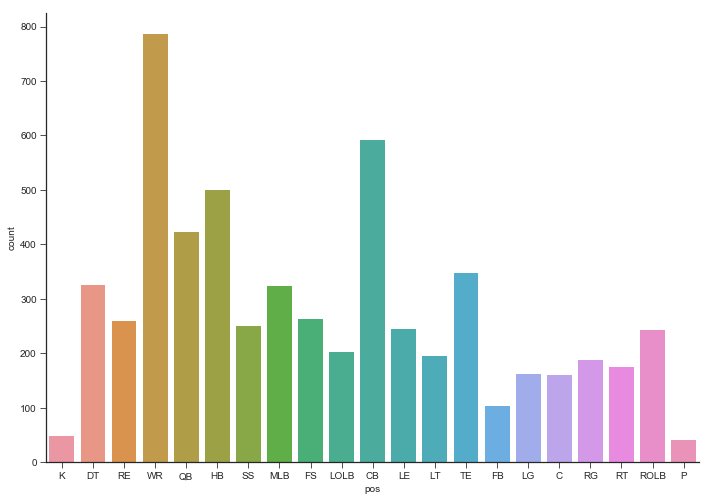

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(data_C['pos'])
sns.despine()

In [ ]:
wrs = data_C[data_C['pos'] == 'WR']

wrs = wrs[['ACC', 'AGI', 'AWR', 'BCV', 'BKS', 'CAR', 'CIT','CTH', 'ELU', 'Go Deep', 'IMP','JKM', 'JMP',
       'KR','Move the Sticks', 'PBK','Playmaker','Pound the Rock', 'RBK', 'RLS', 'RTE','SFA', 'SPC',
       'SPD', 'SPM', 'STA', 'STR','TRK', 'Toughness', 
       'aggressive_catches', 'canAuction', 'clutch', 'fights_for_extra_yards', 'id', 'name', 'ovr',
       'player', 'possession_catches','rac_catches', 'sideline_catches', 'size']]

In [26]:
wrs['possession_catches'] = wrs['possession_catches'].map({1.0:'a', 0.0:'b'})
wrs['possession_catches2'] = wrs['possession_catches'].map({'a':1, 'b':0})
wrs['possession_catches'] = wrs['possession_catches'].map({1:'a', 0:'b'})
wrs.head()

,ACC,AGI,AWR,BCV,BKS,CAR,CIT,CTH,ELU,Go Deep,...,fights_for_extra_yards,id,name,ovr,player,possession_catches,rac_catches,sideline_catches,size,possession_catches2
3,92,89,94,89,58,82,92,95,86,0,...,1,6,NaN,94,Jordy Nelson,a,0,1,"Ht: 6' 3"" Wt: 217",1.0
9,96,96,93,97,43,89,89,90,96,1,...,0,18,NaN,94,Ted Ginn Jr,a,0,1,"Ht: 5' 11"" Wt: 180",1.0
14,96,96,93,96,25,88,85,85,96,1,...,0,23,NaN,93,Devin Hester,b,0,0,"Ht: 5' 11"" Wt: 190",0.0
15,96,95,89,94,41,80,89,90,95,1,...,1,24,NaN,95,Tyreek Hill,b,0,0,"Ht: 5' 10"" Wt: 185",0.0
19,95,94,96,85,45,77,96,96,82,0,...,1,28,NaN,97,Keenan Allen,b,0,1,"Ht: 6' 2"" Wt: 211",0.0


In [30]:
wrs1 = wrs.fillna(0)

In [31]:
wrs1.sort_values('ovr', ascending=False)[:25]

,ACC,AGI,AWR,BCV,BKS,CAR,CIT,CTH,ELU,Go Deep,...,fights_for_extra_yards,id,name,ovr,player,possession_catches,rac_catches,sideline_catches,size,possession_catches2
175,95,92,97,88,35,88,97,97,88,1,...,1,33002,0,99,Dwight Clark,0,0,1,"Ht: 6' 4"" Wt: 212",1.0
362,95,92,97,88,35,88,97,97,88,1,...,1,33002,0,99,Dwight Clark,0,0,1,"Ht: 6' 4"" Wt: 212",1.0
292,96,94,95,95,40,70,92,97,94,0,...,0,32165,0,98,Randy Moss,0,0,1,"Ht: 6' 4"" Wt: 210",1.0
333,98,94,94,90,15,75,95,96,93,0,...,1,32206,0,98,Andre Reed,0,0,1,"Ht: 6' 2"" Wt: 190",1.0
334,98,94,94,90,15,75,95,96,93,1,...,1,32207,0,98,Andre Reed,0,0,1,"Ht: 6' 2"" Wt: 190",1.0
336,98,94,94,90,15,75,95,96,93,0,...,1,32209,0,98,Andre Reed,0,0,1,"Ht: 6' 2"" Wt: 190",1.0
295,96,94,95,95,40,70,92,97,94,0,...,0,32168,0,98,Randy Moss,0,0,1,"Ht: 6' 4"" Wt: 210",1.0
294,96,94,95,95,40,70,92,97,94,0,...,0,32167,0,98,Randy Moss,0,0,1,"Ht: 6' 4"" Wt: 210",1.0
335,98,94,94,90,15,75,95,96,93,0,...,1,32208,0,98,Andre Reed,0,0,1,"Ht: 6' 2"" Wt: 190",1.0
293,96,94,95,95,40,70,92,97,94,1,...,0,32166,0,98,Randy Moss,0,0,1,"Ht: 6' 4"" Wt: 210",1.0


In [32]:
wrs1.columns
wrs1['pos_catch'] = wrs1['possession_catches']
wrs1['SL_catch'] = wrs1['sideline_catches']
wrs1['agg_catch'] = wrs1['aggressive_catches']
wrs1['fights_yds'] = wrs1['fights_for_extra_yards']

drops = ['possession_catches', 'sideline_catches', 'aggressive_catches', 'fights_for_extra_yards']
for d in drops:
    wrs1 = wrs1.drop(d, axis=1)

wrs1.head()

,ACC,AGI,AWR,BCV,BKS,CAR,CIT,CTH,ELU,Go Deep,...,name,ovr,player,rac_catches,size,possession_catches2,pos_catch,SL_catch,agg_catch,fights_yds
3,92,89,94,89,58,82,92,95,86,0,...,0,94,Jordy Nelson,0,"Ht: 6' 3"" Wt: 217",1.0,0,1,1,1
9,96,96,93,97,43,89,89,90,96,1,...,0,94,Ted Ginn Jr,0,"Ht: 5' 11"" Wt: 180",1.0,0,1,0,0
14,96,96,93,96,25,88,85,85,96,1,...,0,93,Devin Hester,0,"Ht: 5' 11"" Wt: 190",0.0,0,0,0,0
15,96,95,89,94,41,80,89,90,95,1,...,0,95,Tyreek Hill,0,"Ht: 5' 10"" Wt: 185",0.0,0,0,0,1
19,95,94,96,85,45,77,96,96,82,0,...,0,97,Keenan Allen,0,"Ht: 6' 2"" Wt: 211",0.0,0,1,1,1


Turning traits into numeric booleans

In [33]:
wrs1['pos_catch'] = wrs1['pos_catch'].astype('bool')*1
wrs1['SL_catch'] = wrs1['SL_catch'].astype('bool')*1
wrs1['agg_catch'] = wrs1['agg_catch'].astype('bool')*1
wrs1['fights_yds'] = wrs1['fights_yds'].astype('bool')*1
wrs1['rac_catches'] = wrs1['rac_catches'].astype('bool')*1

#### Distribution of wide receiver overall ratings

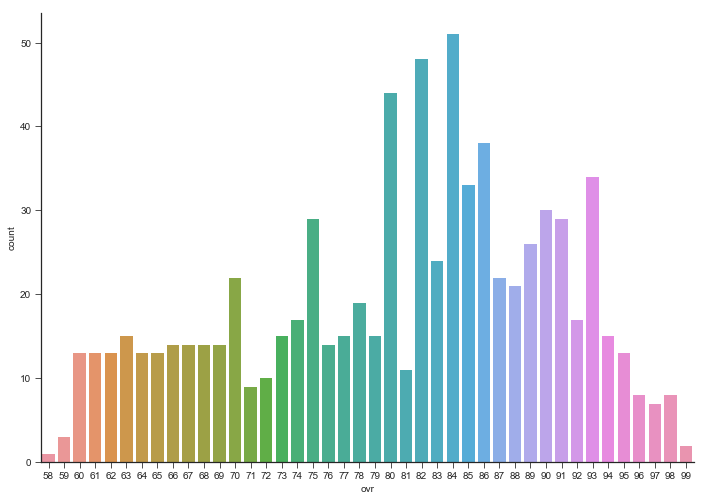

In [34]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(wrs1['ovr'])
sns.despine()

In [100]:
tempdf = data_C

tempdf['strips_ball'] = tempdf['strips_ball'].astype(str)
tempdf['plays_ball_in_air'] = tempdf['plays_ball_in_air'].astype('category')
tempdf['strips_ball'] = tempdf['strips_ball'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})
tempdf['big_hitter'] = tempdf['big_hitter'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})
tempdf['rac_catches'] = tempdf['rac_catches'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})
tempdf['sideline_catches'] = tempdf['sideline_catches'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})
tempdf['possession_catches'] = tempdf['possession_catches'].map({'Yes': 1, 'No': 0, '1.0':1, '0.0':0})

In [101]:
print( 'strips', tempdf['strips_ball'].value_counts() )
print( 'hits', tempdf['big_hitter'].value_counts() )

strips 0.0    1753
1.0    1008
Name: strips_ball, dtype: int64
hits 0.0    1568
1.0     918
Name: big_hitter, dtype: int64


In [36]:
rts = data_C[ data_C['pos']=='RT']
rts = rts

In [44]:
wrs_90 = wrs[wrs['ovr']>=90]

print ( '90+ WRs with PTR', wrs_90['Pound the Rock'].sum() )
print ( '90+ WRs with GD', wrs_90['Go Deep'].sum() )
print ( '90+ WRs with MTS', wrs_90['Move the Sticks'].sum() )

90+ WRs with PTR 7
90+ WRs with GD 18
90+ WRs with MTS 18


In [52]:
off_chems = ['Toughness', 'Go Deep', 'Move the Sticks', 'Pound the Rock']

chem_sorted = []

for chem in off_chems:
    this_chem_players = wrs_90[ wrs_90[chem] == 1]
    chem_sorted.append(this_chem_players['player'])


#### Top Players with each Chemistry

In [58]:
for i in range(0,len(off_chems)):
    print (off_chems[i]);
    print (chem_sorted[i]);
    print ('\n');
    
wrs_90.to_csv('90ovr_wrs_march26.csv')

Toughness
241    Fred Biletnikoff
292          Randy Moss
298          Randy Moss
333          Andre Reed
Name: player, dtype: object


Go Deep
9              Ted Ginn Jr
14            Devin Hester
15             Tyreek Hill
27            Amari Cooper
74     JuJu Smith-Schuster
86           Paul Warfield
132          Paul Warfield
175           Dwight Clark
242       Fred Biletnikoff
293             Randy Moss
296             Randy Moss
334             Andre Reed
362           Dwight Clark
438           Torrey Smith
506       Odell Beckham Jr
511              John Ross
543          Brandin Cooks
544          Brandin Cooks
Name: player, dtype: object


Move the Sticks
3          Jordy Nelson
63        Antonio Brown
64      DeAndre Hopkins
107          Jerry Rice
108      Julian Edelman
153          Jerry Rice
154      Julian Edelman
194        Jordy Nelson
243    Fred Biletnikoff
294          Randy Moss
297          Randy Moss
335          Andre Reed
381        Jordy Nelson
397         

In [75]:
rts_90 = rts[rts['ovr']>=90]

print ( '90+ RTs with PTR', wrs_90['Pound the Rock'].sum() )
print ( '90+ RTs with GD', wrs_90['Go Deep'].sum() )
print ( '90+ RTs with MTS', wrs_90['Move the Sticks'].sum() )
print ( '90+ RTs with TGH', wrs_90['Toughness'].sum() )

90+ RTs with PTR 7
90+ RTs with GD 18
90+ RTs with MTS 18
90+ RTs with TGH 4


In [76]:
oline_atts = ['id', 'player', 'Move the Sticks', 'Pound the Rock', 'Go Deep', 'Toughness',
              'ovr','SPD', 'STR', 'AGI', 'ACC', 'AWR', 'CTH','STA','RBK', 'PBK','IMP', 'size']

rts_90 = rts_90[oline_atts]
rts_90 = rts_90.reset_index()

In [79]:
rts_90 = rts_90.fillna(0)

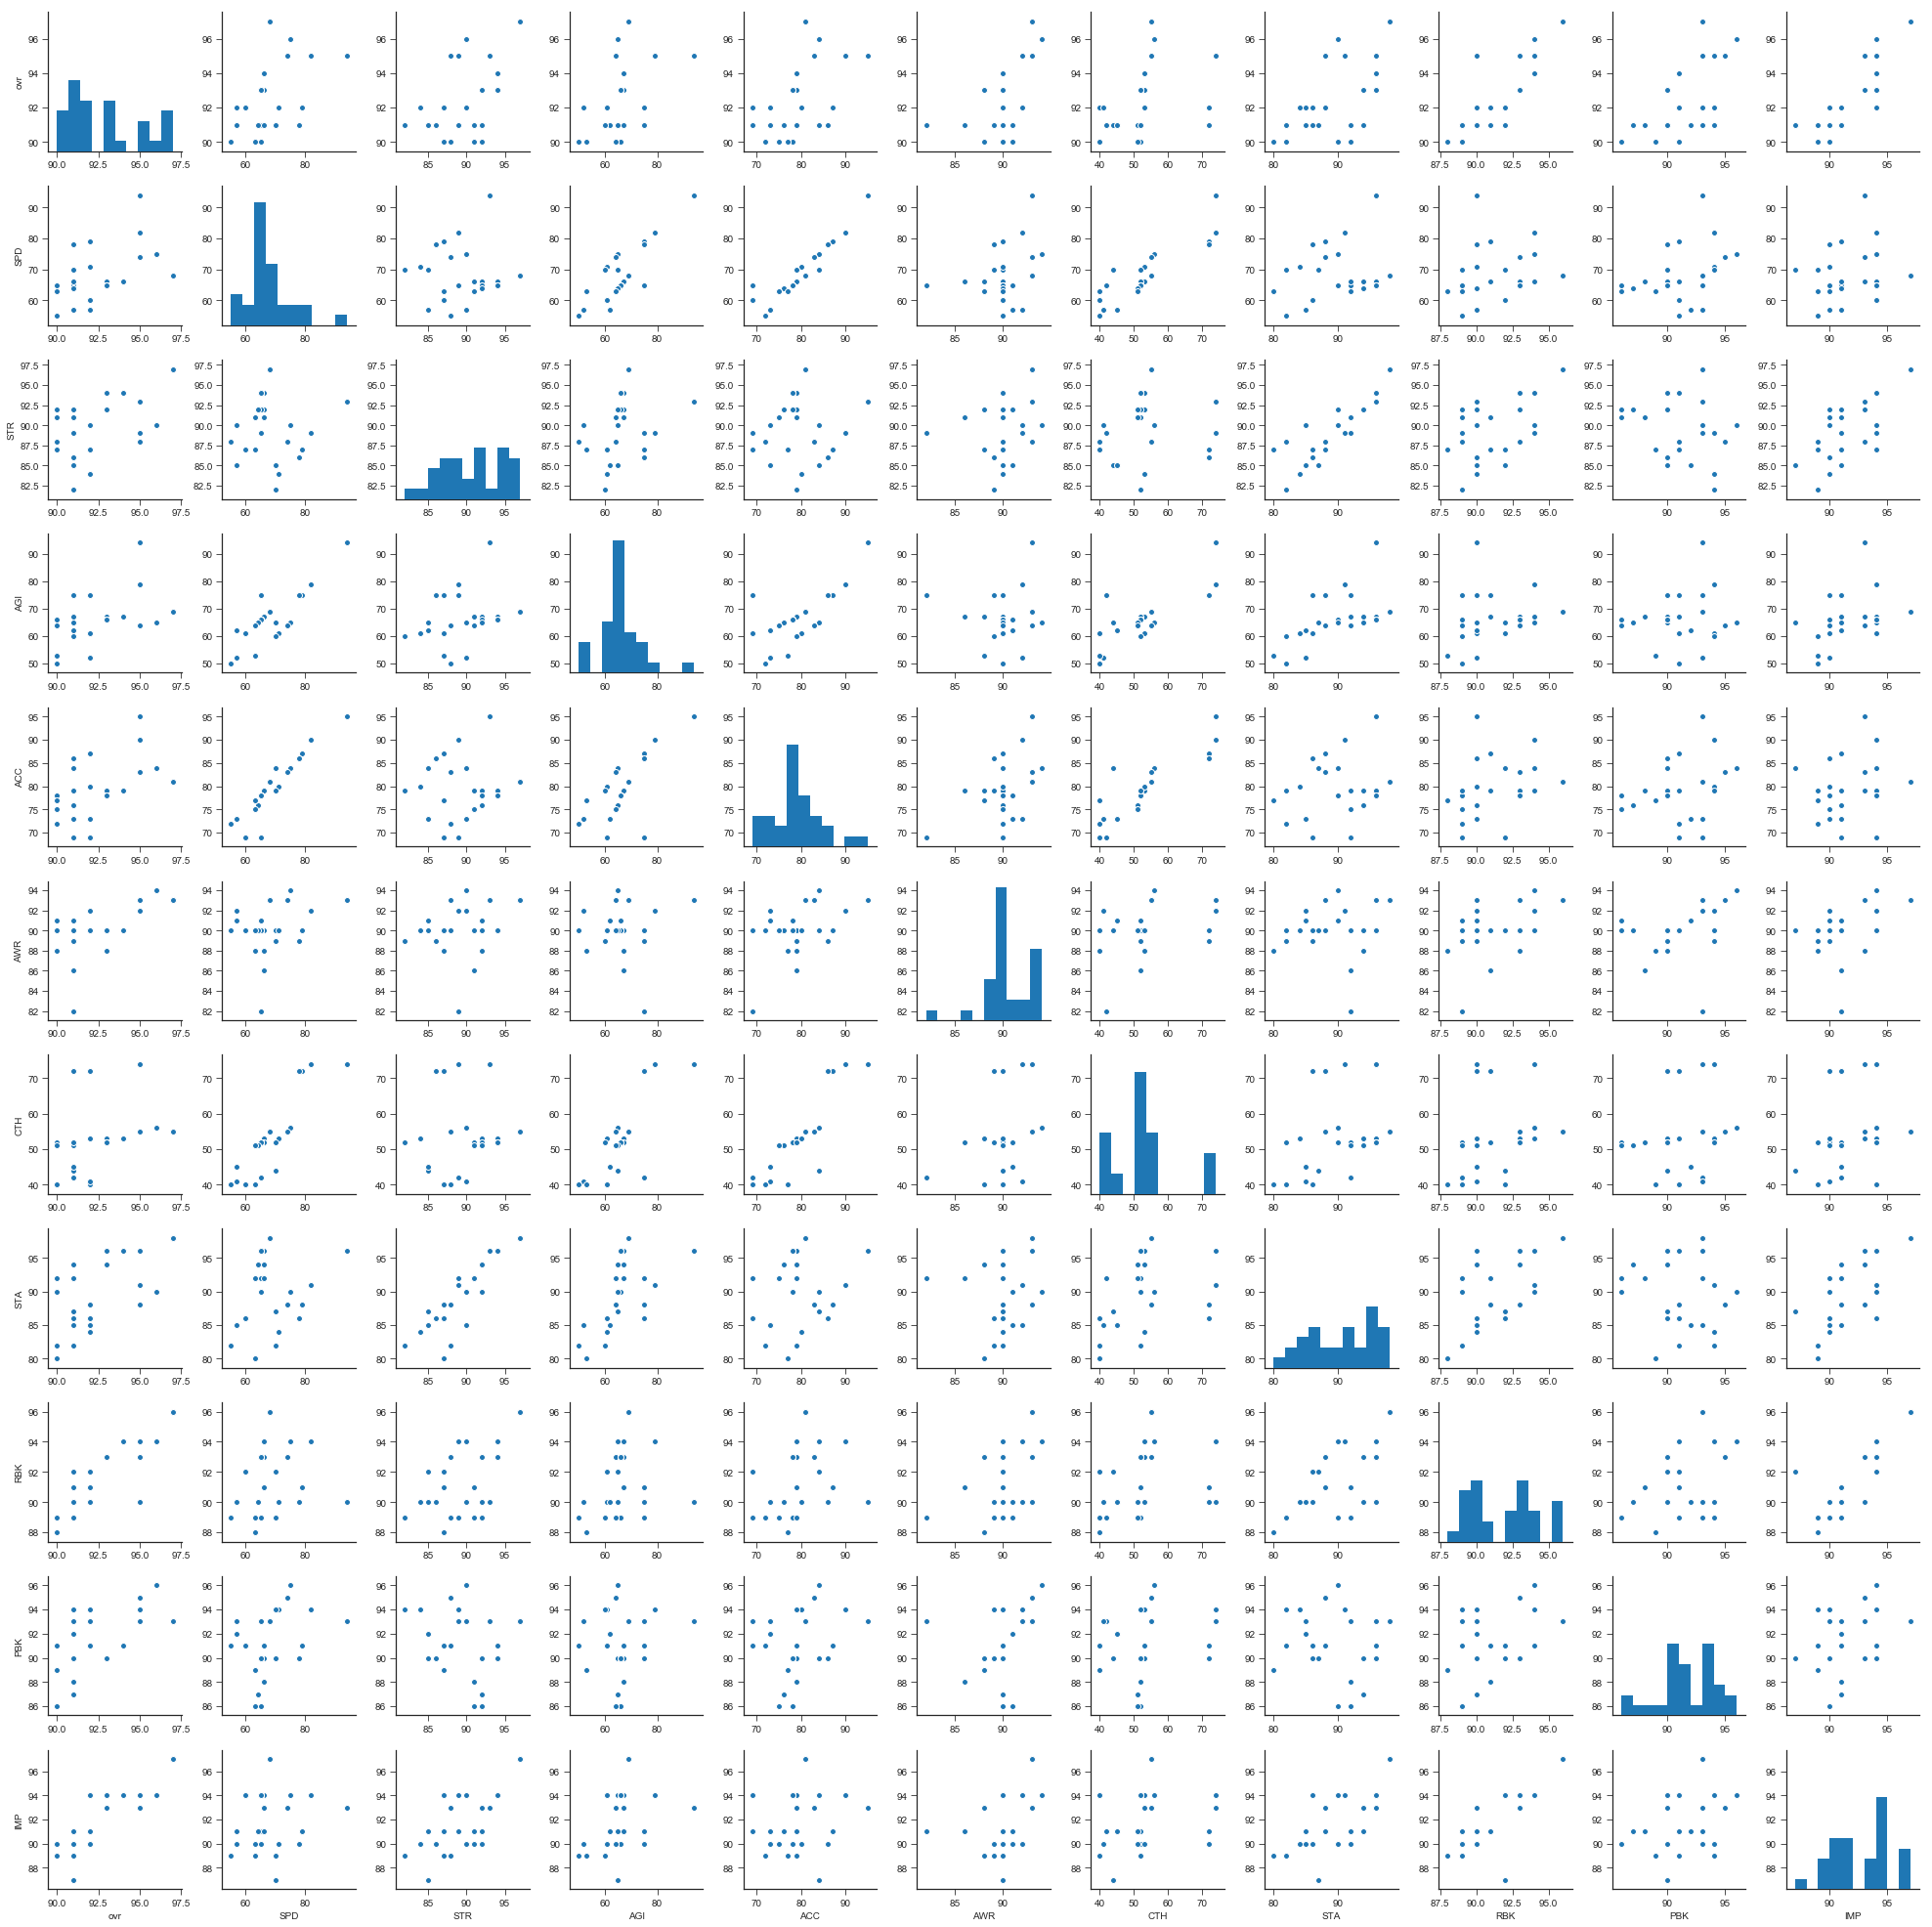

In [86]:
rts_90b = rts_90[['ovr','SPD', 'STR', 'AGI', 'ACC', 'AWR', 'CTH','STA','RBK', 'PBK','IMP']]

sns.pairplot(rts_90b)

In [89]:
wrs_90['possession_catches2'].value_counts()

1.0    32
0.0     4
Name: possession_catches2, dtype: int64

In [105]:
wr_atts = ['name', 'id', 'ovr', 'ACC', 'AGI', 'AWR', 'BCV', 'CAR', 'CIT', 'CTH', 'ELU','IMP', 'JKM', 'JMP', 'KR',  'PBK',
        'RBK', 'RLS', 'RTE', 'SFA', 'SPC', 'SPD','SPM', 'STA', 'STR', 'TRK',  'aggressive_catches',
       'canAuction', 'clutch', 'fights_for_extra_yards', 'id', 'name',  'player', 'rac_catches', 
        'sideline_catches','size', 'possession_catches2', 'Go Deep','Move the Sticks','Playmaker', 'Pound the Rock','Toughness']


wrs_90b = wrs_90[wr_atts]

wrs_90c = wrs_90b[['ovr', 'ACC', 'AGI', 'AWR', 'BCV', 'CAR', 'CIT', 'CTH', 'ELU','IMP', 'JKM', 'JMP', 'KR',  'PBK',
        'RBK', 'RLS', 'RTE', 'SFA', 'SPC', 'SPD','SPM', 'STA', 'STR', 'TRK']]

wrs_90c.dtypes

ovr    int64
ACC    int64
AGI    int64
AWR    int64
BCV    int64
CAR    int64
CIT    int64
CTH    int64
ELU    int64
IMP    int64
JKM    int64
JMP    int64
KR     int64
PBK    int64
RBK    int64
RLS    int64
RTE    int64
SFA    int64
SPC    int64
SPD    int64
SPM    int64
STA    int64
STR    int64
TRK    int64
dtype: object